# **Introduction and Background**

Our final project aims to bring a data-driven perspective to research behind diabetes prediction and prevention.  Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. The scale of this problem is important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. Diabetes is proven to be highly preventable, so by analyzing patterns and trends in diabetes diagnosis data, our goal is to determine the predictors behind diabetes and their degrees of influence in order to educate prediabetics on their risks as well provide comprehensive, empirical insights into diabetes, serving as a resource for researchers and doctors, as well as the general public and high risk populations.

We used a comprehensive dataset, Behavioral Risk Factor Surveillance System, from Kaggle, which documented over 400,000 detailed survey responses each year from 2011-2015 to the Behavioral Risk Factor Surveillance System, a health-related telephone survey that is collected annually by the CDC. The dataset details include characteristics such as diabetes diagnosis, body mass index, physical fitness, diet, smoking habits, income, age, and more. From this dataset, we decided to use data only from 2013, and cleaned it to include only 22 of the most relevant columns.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d cdc/behavioral-risk-factor-surveillance-system

We were originally going to use the dataset found here: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset, but the data was already very clean so there was not really anything left to be done by us for data wrangling/cleaning. So, we decided to use the original dataset that that dataset got its data from, which was linked in the Kaggle page. We used a different year of data so that it is not exactly the same, but we manipulated it so it had pretty much all the same features.

In [ ]:
!unzip /content/behavioral-risk-factor-surveillance-system.zip

In [ ]:
db_df = pd.read_csv('2013.csv');

db_df.head(5)

In [ ]:
db_df.info()

# Data Pre-Processing
By looking through the dataset and the code book to see what each column title and values mean, we have chosen to include all of the features selected in the following cell. Then, for each feature, we will see all the possible values it can have and if it is binary, encode it as 0 for the negative and 1 for the positive. We will leave ordinal features be, but for all features get rid of the missing/refused data.

In [ ]:
#selecting the desired columns
db_df = db_df[['DIABETE3', '_RFHYPE5', 'TOLDHI2', '_CHOLCHK', '_BMI5', 'SMOKE100',
               'CVDSTRK3', 'CVDCRHD4', '_TOTINDA', '_FRTLT1', '_VEGLT1', 'ALCDAY5',
               'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK',
               'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' ]]

In [ ]:
db_df.head(5)

In [ ]:
db_df.info()

In [ ]:
db_df= db_df.dropna()

In [ ]:
db_df['DIABETE3'].unique()
#checking what values the diabetes column contains. 7 refers to cases where they don't know and 9 refers to
#cases where the patient refused, so we will remove those. 2 and 3 refer to either no diabetes or diabetes only during pregnancy,
#so those will be mapped to 0 for no diabetes. 1 refers to diabetes and 4 refers to prediabetes, so those will both be mapped to
#1 for diabetes

In [ ]:
db_df['DIABETE3'] = db_df['DIABETE3'].replace({ 2: 0, 3: 0, 4: 1 })
db_df = db_df[db_df.DIABETE3 != 7]
db_df= db_df[db_df.DIABETE3 != 9]
db_df.DIABETE3.unique()

In [ ]:
db_df['_RFHYPE5'].unique()
#checking what values the blood pressure column contains. 9 refers to refused so
#those rows will be dropped, 1 refers to no high blood pressure so that will be mapped to 0, and 2 refers to high
#blood pressure so that will be mapped to 1

In [ ]:
db_df['_RFHYPE5'] = db_df['_RFHYPE5'].replace({ 1: 0, 2: 1 })
db_df_selected = db_df[db_df._RFHYPE5 != 9]
db_df_selected._RFHYPE5.unique()

In [ ]:
db_df['TOLDHI2'].unique()
#checking what values the high cholesterol column contains. Again, gets rid of
#don't know and refused rows, and maps no high cholesterol to 0 and high cholesterol to 1

In [ ]:
db_df['TOLDHI2'] = db_df['TOLDHI2'].replace({ 2: 0 })
db_df = db_df[db_df.TOLDHI2 != 7]
db_df = db_df[db_df.TOLDHI2 != 9]
db_df.TOLDHI2.unique()

In [ ]:
db_df['_CHOLCHK'].unique()
#checking what values the high cholesterol check contains. Again, gets rid of
#don't know and refused rows, and maps no check in the past 5 years to 0 and
#check in the past 5 years to 1

In [ ]:
db_df['_CHOLCHK'] = db_df['_CHOLCHK'].replace({ 3: 0, 2: 0 })
db_df = db_df[db_df._CHOLCHK != 9]
db_df._CHOLCHK.unique()

In [ ]:
db_df['_BMI5'].unique()
#checking what values the bmi column contains. These are the bmi values times 100, so we divided them by 100 to get them back to normal

In [ ]:
db_df['_BMI5'] = db_df['_BMI5'].apply(lambda x: x // 100)
db_df._BMI5.unique()

In [ ]:
db_df['SMOKE100'].unique()
#checking what values the smoking column contains. Again, gets rid of
#don't know and refused rows, and maps no smoking to 0 and smoking to 1

In [ ]:
db_df['SMOKE100'] = db_df['SMOKE100'].replace({ 2: 0 })
db_df = db_df[db_df.SMOKE100 != 7]
db_df = db_df[db_df.SMOKE100 != 9]
db_df.SMOKE100.unique()

In [ ]:
db_df['CVDSTRK3'].unique()
#checking what values the stroke column contains. Again, gets rid of
#don't know and refused rows, and maps no stroke to 0 and stroke to 1

In [ ]:
db_df['CVDSTRK3'] = db_df['CVDSTRK3'].replace({ 2: 0 })
db_df = db_df[db_df.CVDSTRK3 != 7]
db_df = db_df[db_df.CVDSTRK3 != 9]
db_df.CVDSTRK3.unique()

In [ ]:
db_df['CVDCRHD4'].unique()
#checking what values the heart disease/attack column contains. Again, gets rid of
#don't know and refused rows, and maps no heart disease/attack to 0 and heart disease/attack to 1

In [ ]:
db_df['CVDCRHD4'] = db_df['CVDCRHD4'].replace({ 2: 0 })
db_df = db_df[db_df.CVDCRHD4 != 7]
db_df = db_df[db_df.CVDCRHD4 != 9]
db_df.CVDCRHD4.unique()

In [ ]:
db_df['_TOTINDA'].unique()
#checking what values the physical activity column contains. Again, gets rid of
#don't know and refused rows, and maps no physical activity to 0 and physical activity to 1

In [ ]:
db_df['_TOTINDA'] = db_df['_TOTINDA'].replace({ 2: 0 })
db_df = db_df[db_df._TOTINDA != 9]
db_df._TOTINDA.unique()

In [ ]:
db_df['_FRTLT1'].unique()
#checking what values the fruits column contains. Again, gets rid of
#don't know and refused rows, and maps no fruits to 0 and fruits to 1

In [ ]:
db_df['_FRTLT1'] = db_df['_FRTLT1'].replace({ 2: 0 })
db_df = db_df[db_df._FRTLT1 != 9]
db_df._FRTLT1.unique()

In [ ]:
db_df['_VEGLT1'].unique()
#checking what values the vegetables column contains. Again, gets rid of
#don't know and refused rows, and maps no vegetables to 0 and vegetables to 1

In [ ]:
db_df['_VEGLT1'] = db_df['_VEGLT1'].replace({ 2: 0 })
db_df = db_df[db_df._VEGLT1 != 9]
db_df._VEGLT1.unique()

In [ ]:
db_df['ALCDAY5'].unique()
#checking what values the alcohol column contains. Again, gets rid of
#don't know and refused rows, and maps no drinks to 0 and drinks in the last 30 days to 1

In [ ]:
db_df['ALCDAY5'] = db_df['ALCDAY5'].replace({ 888: 0 })
db_df['ALCDAY5'] = db_df['ALCDAY5'].apply(lambda x: 1 if x >= 100 and x <= 300 else x)
db_df = db_df[db_df.ALCDAY5 != 777]
db_df = db_df[db_df.ALCDAY5 != 999]
db_df.ALCDAY5.unique()

In [ ]:
db_df['HLTHPLN1'].unique()
#checking what values the health plan column contains. Again, gets rid of
#don't know and refused rows, and maps no health care to 0 and health care to 1

In [ ]:
db_df['HLTHPLN1'] = db_df['HLTHPLN1'].replace({ 2: 0 })
db_df = db_df[db_df.HLTHPLN1 != 7]
db_df = db_df[db_df.HLTHPLN1 != 9]
db_df.HLTHPLN1.unique()

In [ ]:
db_df['MEDCOST'].unique()
#checking what values the doctor because of cost column contains. Again, gets rid of
#don't know and refused rows, and maps no doctor because of cost to 0 and doctor to 1

In [ ]:
db_df['MEDCOST'] = db_df['MEDCOST'].replace({ 2: 0 })
db_df = db_df[db_df.MEDCOST != 7]
db_df = db_df[db_df.MEDCOST != 9]
db_df.MEDCOST.unique()

In [ ]:
db_df['GENHLTH'].unique()
#checking what values the general health column contains. Again, gets rid of
#don't know and refused rows, but keeps ordinal values of 1-5 (meaning excellent to poor)

In [ ]:
db_df = db_df[db_df.GENHLTH != 7]
db_df = db_df[db_df.GENHLTH != 9]
db_df.GENHLTH.unique()

In [ ]:
db_df['MENTHLTH'].unique()
#checking what values the mental health column contains. Again, gets rid of
#don't know and refused rows, but keeps ordinal values of 0-30 (meaning number of bad mental
#health days in the last month), has to map 88 to 0 for no bad days

In [ ]:
db_df['MENTHLTH'] = db_df['MENTHLTH'].replace({ 88: 0 })
db_df = db_df[db_df.MENTHLTH != 77]
db_df = db_df[db_df.MENTHLTH != 99]
db_df.MENTHLTH.unique()

In [ ]:
db_df['PHYSHLTH'].unique()
#checking what values the physical health column contains. Again, gets rid of
#don't know and refused rows, but keeps ordinal values of 0-30 (meaning number of days exercised in the last month), has to map 88 to 0 for no bad days

In [ ]:
db_df['PHYSHLTH'] = db_df['PHYSHLTH'].replace({ 88: 0 })
db_df = db_df[db_df.PHYSHLTH != 77]
db_df = db_df[db_df.PHYSHLTH != 99]
db_df.PHYSHLTH.unique()

In [ ]:
db_df['DIFFWALK'].unique()
#checking what values the difficulty walking column contains. Again, gets rid of
#don't know and refused rows, but maps difficulty walking to 1 and no difficulty to 0

In [ ]:
db_df['DIFFWALK'] = db_df['DIFFWALK'].replace({ 2: 0 })
db_df = db_df[db_df.DIFFWALK != 7]
db_df = db_df[db_df.DIFFWALK != 9]
db_df.DIFFWALK.unique()

In [ ]:
db_df['SEX'].unique()
#checking what values the sex column contains. Maps difficulty walking to 1 and no difficulty to 0

In [ ]:
db_df['SEX'] = db_df['SEX'].replace({ 2: 'male', 1: 'female' })
db_df['SEX'].unique()

In [ ]:
db_df = pd.get_dummies(db_df, columns=['SEX'])

In [ ]:
db_df['SEX_female'] = db_df['SEX_female'].astype(float)
db_df['SEX_male'] = db_df['SEX_male'].astype(float)

In [ ]:
db_df.head()

In [ ]:
db_df['_AGEG5YR'].unique()
#checking what values the age column contains. Already contains ordinal values, so just removes
#14 because it stands for don't know/missing

In [ ]:
db_df = db_df[db_df._AGEG5YR != 14]
db_df._AGEG5YR.unique()

In [ ]:
db_df['EDUCA'].unique()
#checking what values the education column contains. Already contains ordinal values from 1-6, so just removes
#9 because it stands for refused

In [ ]:
db_df = db_df[db_df.EDUCA != 9]
db_df.EDUCA.unique()

In [ ]:
db_df['INCOME2'].unique()
#checking what values the income column contains. Already contains ordinal values from 1-8, so just removes
#99 and 77 because it stands for refused/don't know

In [ ]:
db_df = db_df[db_df.INCOME2 != 77]
db_df = db_df[db_df.INCOME2 != 99]
db_df.INCOME2.unique()

In [ ]:
#rename the columns
db_df = db_df.rename(columns = {'DIABETE3':'diabetes',
                                         '_RFHYPE5':'high_bp',
                                         'TOLDHI2':'high_chol',
                                          '_CHOLCHK':'chol_check',
                                         '_BMI5':'bmi',
                                         'SMOKE100':'smoker',
                                         'CVDSTRK3':'stroke',
                                          'CVDCRHD4':'heart_disease_or_attack',
                                         '_TOTINDA':'phys_activity',
                                         '_FRTLT1':'fruits',
                                          '_VEGLT1':"veggies",
                                         'ALCDAY5':'hvy_alc_consump',
                                         'HLTHPLN1':'healthcare',
                                          'MEDCOST':'no_doc_because_cost',
                                         'GENHLTH':'gen_health',
                                          'MENTHLTH':'mental_health',
                                          'PHYSHLTH':'phy_health',
                                          'DIFFWALK':'diff_walking',
                                         'SEX_male':'male',
                                          'SEX_female': 'female',
                                          '_AGEG5YR':'age',
                                          'EDUCA':'education',
                                          'INCOME2':'income' })

In [ ]:
db_df.head()

In [ ]:
db_df = db_df.copy()

# EDA
Now that the data is in a more readable format, we can do some analysis on it to decide what we have to consider when making our model.

In [ ]:
classes = db_df['diabetes'].value_counts()

bars = plt.bar(classes.index, classes.values, color=['firebrick', 'royalblue'], alpha=0.8)

plt.title("Class Imbalance in Target Variable")
plt.xlabel("Presence of Diabetes/Prediabetes")
plt.ylabel("Number of Observations")
plt.xticks(classes.index, ["No", "Yes"])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, int(height), ha='center', va='bottom')


plt.show()

This bar chart shoes the class imbalance of this dataset, as there are many more people without diabetes than with. This means that we will have to be sure to make train-test splits with equal distributions of diabetes.

Graph visualizes the distribution of

In [ ]:
corr_mx = db_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_mx, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

plt.title('Correlation Heatmap of Predictor Variables')

plt.show()

This correlation heatmap shows the correlation between every variable and every other variable. Since some of the variables are somewhat correlated with each other, like education and income, it may be smart to use some kind of dimensionality reduction like PCA if we use a model susceptible to overfitting by multicolinearity, like a decision tree.

In [ ]:
scaled_features = ['bmi', 'gen_health', 'mental_health', 'phy_health', 'age', 'education', 'income']

plt.figure(figsize=(12, 10))

for i, column in enumerate(scaled_features):
    value_counts = db_df[column].value_counts()

    plt.subplot(3, 3, i + 1)
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'Bar Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

This chart shows a histogram for every ordinal feature so we can vizualise their distributions. Some of them have very skewed distributions, like physical health, and they range quite a lot in their scale, so it may be a good idea to scale the features down if we are going to use a scale-variant method such as PCA.

In [ ]:
scaler = StandardScaler()

db_df[scaled_features] = scaler.fit_transform(db_df[scaled_features])

db_df

In [ ]:
X = db_df.drop(columns="diabetes")
y = db_df['diabetes']

pca = PCA()
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

We tried using PCA to eliminate the correlation between correlated variables, but it ended up producing weird results, so we ended up not using it.

In [ ]:

seed = 12345

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed, shuffle=True)

Logistic Regression
Our baseline model was a logistic regression model, as it is a simple way to do classification and we have experience using it from the last homework. We used it both with and without the class_weight='balanced' parameter, which would make sure that there was a balanced amount of diabetes and no diabetes in the training model, to see which was better.

In [ ]:
lrg = LogisticRegression(class_weight='balanced')
lrg.fit(X_train, y_train)

lrg_unweighted = LogisticRegression()
lrg_unweighted.fit(X_train, y_train)

In [ ]:
lrg_test_pred = lrg.predict(X_test)
lrg_train_pred = lrg.predict(X_train)

lrg_unweighted_test_pred = lrg_unweighted.predict(X_test)
lrg_unweighted_train_pred = lrg_unweighted.predict(X_train)

In [ ]:
lrg_train_acc = accuracy_score(y_train, lrg_train_pred)
lrg_test_acc = accuracy_score(y_test, lrg_test_pred)
lrg_train_rec = recall_score(y_train, lrg_train_pred)
lrg_test_rec = recall_score(y_test, lrg_test_pred)
lrg_train_pre = precision_score(y_train, lrg_train_pred)
lrg_test_pre = precision_score(y_test, lrg_test_pred)

print('Weighted Logistic Regression')
print(f'Training Accuracy: {lrg_train_acc*100:.2f}%')
print(f'Testing Accuracy: {lrg_test_acc*100:.2f}%')
print(f'Training Recall: {lrg_train_rec*100:.2f}%')
print(f'Testing Recall: {lrg_test_rec*100:.2f}%')
print(f'Training Precision: {lrg_train_pre*100:.2f}%')
print(f'Testing Precision: {lrg_test_pre*100:.2f}%')

lrg_unweighted_train_acc = accuracy_score(y_train, lrg_unweighted_train_pred)
lrg_unweighted_test_acc = accuracy_score(y_test, lrg_unweighted_test_pred)
lrg_unweighted_train_rec = recall_score(y_train, lrg_unweighted_train_pred)
lrg_unweighted_test_rec = recall_score(y_test, lrg_unweighted_test_pred)
lrg_unweighted_train_pre = precision_score(y_train, lrg_unweighted_train_pred)
lrg_unweighted_test_pre = precision_score(y_test, lrg_unweighted_test_pred)

print()
print('Unweighted Logistic Regression')
print(f'Training Accuracy: {lrg_unweighted_train_acc*100:.2f}%')
print(f'Testing Accuracy: {lrg_unweighted_test_acc*100:.2f}%')
print(f'Training Recall: {lrg_unweighted_train_rec*100:.2f}%')
print(f'Testing Recall: {lrg_unweighted_test_rec*100:.2f}%')
print(f'Training Precision: {lrg_unweighted_train_pre*100:.2f}%')
print(f'Testing Precision: {lrg_unweighted_test_pre*100:.2f}%')

lrg_train_mx = confusion_matrix(y_train, lrg_train_pred)
print(lrg_train_mx)
lrg_test_mx = confusion_matrix(y_test, lrg_test_pred)
print(lrg_test_mx)

lrg_unweighted_train_mx = confusion_matrix(y_train, lrg_unweighted_train_pred)
print(lrg_unweighted_train_mx)
lrg_unweighted_test_mx = confusion_matrix(y_test, lrg_unweighted_test_pred)
print(lrg_unweighted_test_mx)

The results showed that while the unweighted had higher accuracy, the weighted had much higher recall. In the context of medicine, recall is more important because it is much better to have false positives than false negatives. We will now perform grid search on both the balanced and unbalanced class weight and different values of C.

In [ ]:
cv = StratifiedKFold(random_state=seed, shuffle=True, n_splits=5)

estimator = LogisticRegression(solver='saga', max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 0.25, 0.50, 0.75, 1.0],
    'class_weight': [None, 'balanced']
}

scoring = 'recall'

search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring=scoring, verbose=2)

search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..........................C=0.01, class_weight=None; total time=   5.2s
[CV] END ..........................C=0.01, class_weight=None; total time=  11.3s
[CV] END ..........................C=0.01, class_weight=None; total time=   9.7s
[CV] END ..........................C=0.01, class_weight=None; total time=   4.6s
[CV] END ..........................C=0.01, class_weight=None; total time=   3.9s
[CV] END ......................C=0.01, class_weight=balanced; total time=   3.6s
[CV] END ......................C=0.01, class_weight=balanced; total time=   2.3s
[CV] END ......................C=0.01, class_weight=balanced; total time=   2.4s
[CV] END ......................C=0.01, class_weight=balanced; total time=   3.4s
[CV] END ......................C=0.01, class_weight=balanced; total time=   4.0s
[CV] END ...........................C=0.1, class_weight=None; total time=  22.0s
[CV] END ...........................C=0.1, class

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12345, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': [0.01, 0.1, 0.25, 0.5, 0.75, 1.0],
                         'class_weight': [None, 'balanced']},
             scoring='recall', verbose=2)

In [ ]:
print(f'The best Logistic Regression model has hyperparameters {search.best_params_}')
print(f'The best model achieves an average cross-validation score of {search.best_score_*100:.2f}%')
print(f'The best model achieves a score of {recall_score(y_test, search.best_estimator_.predict(X_test))*100:.2f}% on the testing data')

The best Logistic Regression model has hyperparameters {'C': 0.25, 'class_weight': 'balanced'}
The best model achieves an average cross-validation score of 76.65%
The best model achieves a score of 76.18% on the testing data


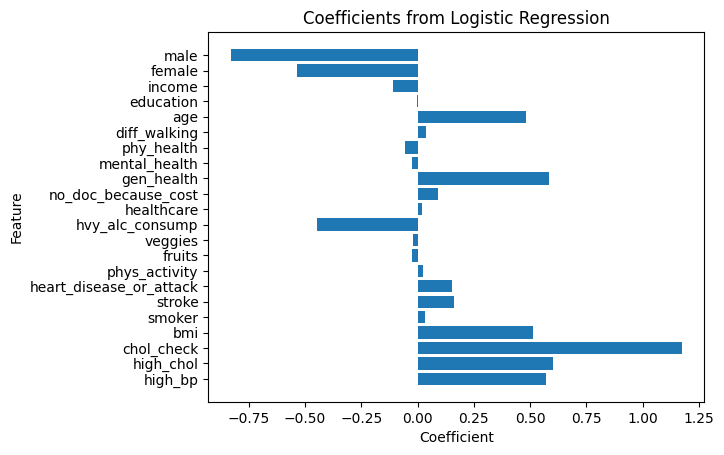

In [ ]:
feature_importances = lrg.coef_[0]
feature_columns = db_df.drop(columns="diabetes").columns

plt.barh(feature_columns, feature_importances)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coefficients from Logistic Regression')
plt.show()

The next model we used was a decision tree, since it would allow us to better examine the feature importances. We again used class_weight='balanced', and tested the accuracy, recall, and precision on the test and training data. We performed grid search for hyperparameter tuning again, varying the max_depth, min_samples_split, and min_samples_leaf

In [ ]:
dt_classifier = DecisionTreeClassifier(class_weight='balanced')

dt_classifier.fit(X_train, y_train)

test_pred = dt_classifier.predict(X_test)
train_pred = dt_classifier.predict(X_train)

In [ ]:
dt_test_acc = accuracy_score(y_test, test_pred)
dt_test_rec = recall_score(y_test, test_pred)
dt_test_pre = precision_score(y_test, test_pred)
dt_train_acc = accuracy_score(y_train, train_pred)
dt_train_rec = recall_score(y_train, train_pred)
dt_train_pre = precision_score(y_train, train_pred)

print()
print('Decision Tree Classifier')
print(f'Testing Accuracy: {dt_test_acc*100:.2f}%')
print(f'Testing Recall: {dt_test_rec*100:.2f}%')
print(f'Testing Precision: {dt_test_pre*100:.2f}%')
print(f'Training Accuracy: {dt_train_acc*100:.2f}%')
print(f'Training Recall: {dt_train_rec*100:.2f}%')
print(f'Training Precision: {dt_train_pre*100:.2f}%')

dt_train_mx = confusion_matrix(y_train, train_pred)
print(dt_train_mx)
dt_test_mx = confusion_matrix(y_test, test_pred)
print(dt_test_mx)


Decision Tree Classifier
Testing Accuracy: 78.60%
Testing Recall: 30.42%
Testing Precision: 30.32%
Training Accuracy: 99.34%
Training Recall: 99.86%
Training Precision: 95.99%
[[200905   1529]
 [    52  36623]]
[[44199  6410]
 [ 6380  2789]]


In [ ]:
cv = StratifiedKFold(random_state=seed, shuffle=True, n_splits=5)

estimator = DecisionTreeClassifier(class_weight='balanced')

param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scoring = 'recall'

search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring=scoring, verbose=2)

search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   1.3s
[C

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12345, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall', verbose=2)

In [ ]:
print(f'The best Decision Tree Classifier model has hyperparameters {search.best_params_}')
print(f'The best model achieves an average cross-validation score of {search.best_score_*100:.2f}%')
print(f'The best model achieves a score of {recall_score(y_test, search.best_estimator_.predict(X_test))*100:.2f}% on the testing data')

The best Decision Tree Classifier model has hyperparameters {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
The best model achieves an average cross-validation score of 76.89%
The best model achieves a score of 77.24% on the testing data


Since the recall was still pretty low, we tried using a random forest classifier, as using an ensemble method can help with overfitting. Since the test recall was still pretty poor, we did hyperparameter tuning again, but it did not improve the results much.

In [ ]:
rf_classifier = RandomForestClassifier(class_weight='balanced')

rf_classifier.fit(X_train, y_train)

test_pred = rf_classifier.predict(X_test)
train_pred = rf_classifier.predict(X_train)

In [ ]:
rf_test_acc = accuracy_score(y_test, test_pred)
rf_test_rec = recall_score(y_test, test_pred)
rf_test_pre = precision_score(y_test, test_pred)
rf_train_acc = accuracy_score(y_train, train_pred)
rf_train_rec = recall_score(y_train, train_pred)
rf_train_pre = precision_score(y_train, train_pred)

print()
print('Random Forest Classifier')
print(f'Testing Accuracy: {rf_test_acc*100:.2f}%')
print(f'Testing Recall: {rf_test_rec*100:.2f}%')
print(f'Testing Precision: {rf_test_pre*100:.2f}%')
print(f'Training Accuracy: {rf_train_acc*100:.2f}%')
print(f'Training Recall: {rf_train_rec*100:.2f}%')
print(f'Training Precision: {rf_train_pre*100:.2f}%')

rf_train_mx = confusion_matrix(y_train, train_pred)
print(rf_train_mx)
rf_test_mx = confusion_matrix(y_test, test_pred)
print(rf_test_mx)


Random Forest Classifier
Testing Accuracy: 84.72%
Testing Recall: 18.61%
Testing Precision: 50.49%
Training Accuracy: 99.47%
Training Recall: 99.35%
Training Precision: 97.22%
[[201393   1041]
 [   237  36438]]
[[48936  1673]
 [ 7463  1706]]


In [ ]:
cv = StratifiedKFold(random_state=seed, shuffle=True, n_splits=5)

estimator = RandomForestClassifier(class_weight='balanced', max_depth=40)

param_grid = {
    'n_estimators': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scoring = 'recall'

search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring=scoring, verbose=2)

search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  34.0s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  38.1s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  35.4s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  41.3s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  41.3s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  13.8s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  20.0s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  14.0s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.8s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  14.3s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=10; total 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12345, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=40),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 50, 10]},
             scoring='recall', verbose=2)

In [ ]:
print(f'The best Random Forest Classifier model has hyperparameters {search.best_params_}')
print(f'The best model achieves an average cross-validation score of {search.best_score_*100:.2f}%')
print(f'The best model achieves a score of {recall_score(y_test, search.best_estimator_.predict(X_test))*100:.2f}% on the testing data')

The best Random Forest Classifier model has hyperparameters {'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
The best model achieves an average cross-validation score of 61.60%
The best model achieves a score of 61.64% on the testing data


While logistic regression gave the best results for recall, the random forest classifier is useful for viewing the feature importances. We can see that the most important features are bmi, age, and general health.

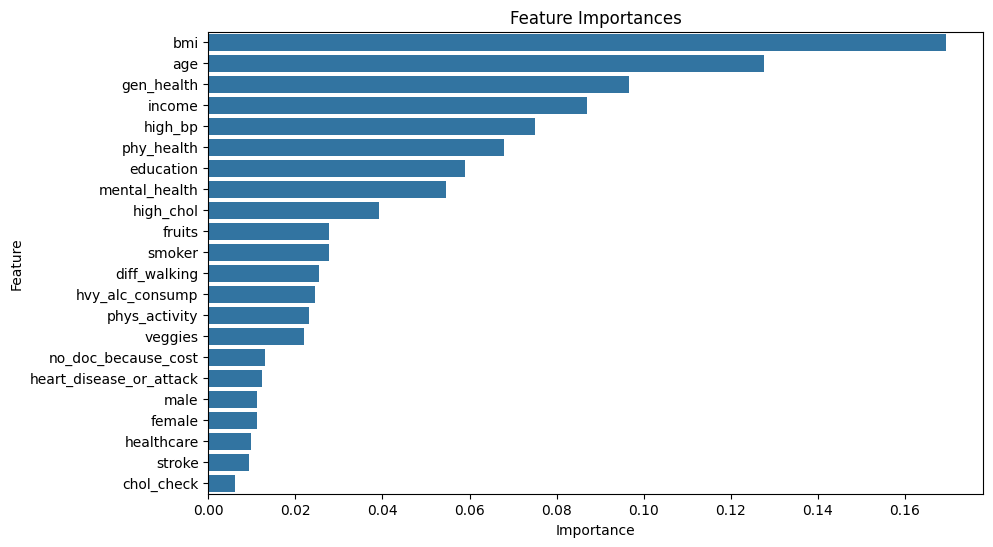

In [ ]:
feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# **Discussion and Conclusion**

Key takeaways and implications: The most important factors to consider when predicting diabetes are BMI, age, general health, income, blood pressure, mental health, and cholesterol. Our logistic regression model was the best for predicting diabetes as it had the highest recall, which is the most important thing to consider in the context of medicine.


 Risk Factors: Identify key factors such as BMI, physical fitness, diet, smoking habits, etc., that are associated with diabetes.
Demographic Patterns: Explore how age, income, and other demographic variables correlate with diabetes.

Public Health Policies: Insights can inform public health policies aimed at diabetes prevention and management.
Health Interventions: Identify target populations for health interventions and education programs.
Personalized Medicine: Explore the potential for personalized medicine approaches based on individual risk factors.

Feature importance and model limitations:

Model Assumptions: Logistic regression assumes a linear relationship between features and the log-odds of the outcome, which may not hold true in all cases.
Generalization: Assess how well the model generalizes to new, unseen data, and if there are any limitations in its applicability to different populations or contexts, especially time wise

Challenges faced: Challenges we faced included encoding and relabeling data columns in a CDC and choosing out dataset. Our data was from the CDC and every column was labeled with a code so we had to check between the BRFSS codebook report and the column codes when we were cleaning the data. Each column predictor also had a unique range of values representing different meaning, which we had to standardize through preprocessing and encoding categorical data based on the numbers and meanings assigned in the codebook. Another challenge we encountered was choosing our dataset as we initially were planning on using a pre cleaned version of the dataset but wanted to be able to select the exact features that we wanted instead. So, we switched our dataset to an uncleaned CDC dataset, which required additional data cleaning and analysis.



Potential improvement and future work: Looking forward, we can incorporate additional datasets to further explore data. For example, we used a dataset from 2015, but we could incorporate longitudinal analysis to track changes in risk factors over time and predict future diabetes risk more accurately. This could provide additional context on diabetes patterns and improve the predictive power of models.
We could also further develop our project into a clinical decision support system that integrates our predictive model into healthcare workflows, providing healthcare professionals with real-time risk assessments for their patients. Additionally the models could also be integrated into the development of a mobile health application that uses our predictive model to provide personalized recommendations for individuals to reduce their risk of developing diabetes. In order to provide deeper insight into diabetes predictions, we could also integrate advanced NLP and image processing techniques. For example, if there are text-based datasets available, you could apply advanced natural language processing (NLP) techniques to extract more nuanced features related to health behaviors, social determinants, or other factors that could influence diabetes risk, and using multimedia data such as images or videos could provide additional context for predicting diabetes risk. For example, you could analyze food images to extract dietary patterns or use facial recognition to infer emotional states that could be related to stress, a risk factor for diabetes.


